In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

from io import BytesIO
import requests

from sklearn import metrics


In [2]:
data_uri = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSm6n7GRxrqONtCX9auBmLXhpvbdWqVq8BWjBcXayouLQ0K4haX_0A9k5gCBGJ11KYCTnbo2Ctd1lCE/pub?gid=304235487&single=true&output=csv"

In [3]:
data_df = pd.read_csv(data_uri, parse_dates=['Timestamp'])
data_df.head()

,Timestamp,Name,Watch the Video 1 and select the most suitable suitable action description?,Watch the Video 2 and select the most suitable suitable action description?,Watch the Video 3 and select the most suitable suitable action description?,Watch the Video 4 and select the most suitable suitable action description?,Watch the Video 5 and select the most suitable suitable action description?,Watch the Video 6 and select the most suitable suitable action description?,Watch the Video 7 and select the most suitable suitable action description?,Watch the Video 8 and select the most suitable suitable action description?,...,How confident were you in your selection.12,Gender,What is your age group?,Please indicate your highest educational level.,What is your level of experience with machine Learning?,vid1_corr,vid2_corr,vid3_corr,vid4_corr,vid5_corr
0,2023-06-01 21:54:40,NaN,Lying / Sitting / Standing,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,"Running, Cycling / Playing soccer / Rope jumping",Watching TV / Computer work / Car driving,"Running, Cycling / Playing soccer / Rope jumping","Running, Cycling / Playing soccer / Rope jumping",...,4,Male,18 - 24 years,Bachelor Degree,Less than 6 months,1.0,1.0,1.0,1.0,0.0
1,2023-06-01 22:06:42,NaN,Lying / Sitting / Standing,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,"Running, Cycling / Playing soccer / Rope jumping",Watching TV / Computer work / Car driving,"Running, Cycling / Playing soccer / Rope jumping","Running, Cycling / Playing soccer / Rope jumping",...,4,Male,25 - 29 years,Bachelor Degree,Less than 6 months,1.0,1.0,1.0,1.0,NaN
2,2023-06-01 22:16:24,NaN,Lying / Sitting / Standing,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,"Running, Cycling / Playing soccer / Rope jumping",Vacuum cleaning / Ironing / Folding laundry / ...,Lying / Sitting / Standing,Lying / Sitting / Standing,...,5,Male,25 - 29 years,Bachelor Degree,Less than 6 months,1.0,1.0,1.0,1.0,NaN
3,2023-06-01 22:18:21,NaN,Lying / Sitting / Standing,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,Vacuum cleaning / Ironing / Folding laundry / ...,Watching TV / Computer work / Car driving,"Running, Cycling / Playing soccer / Rope jumping","Running, Cycling / Playing soccer / Rope jumping",...,4,Male,18 - 24 years,Bachelor Degree,Less than 6 months,1.0,1.0,1.0,1.0,NaN
4,2023-06-01 22:19:00,NaN,Lying / Sitting / Standing,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,"Running, Cycling / Playing soccer / Rope jumping",Watching TV / Computer work / Car driving,"Running, Cycling / Playing soccer / Rope jumping","Running, Cycling / Playing soccer / Rope jumping",...,4,Male,25 - 29 years,Bachelor Degree,Less than 6 months,1.0,1.0,1.0,1.0,NaN


In [4]:
del data_df['Score']

In [5]:
data_df.columns[2:15]

Index(['Watch the Video 1 and select the most suitable suitable action description?',
       'Watch the Video 2 and select the most suitable suitable action description?',
       'Watch the Video 3 and select the most suitable suitable action description?',
       'Watch the Video 4 and select the most suitable suitable action description?',
       'Watch the Video 5 and select the most suitable suitable action description?',
       'Watch the Video 6 and select the most suitable suitable action description?',
       'Watch the Video 7 and select the most suitable suitable action description?',
       'Watch the Video 8 and select the most suitable suitable action description?',
       'Watch the Video 9 and select the most suitable suitable action description?',
       'Watch the Video 10 and select the most suitable suitable action description?',
       'Watch the Video 11 and select the most suitable suitable action description?',
       'Watch the Video 12 and select the most suita

In [6]:
data_df.columns[16:29]

Index(['How confident were you in your selection',
       'How confident were you in your selection.1',
       'How confident were you in your selection.2',
       'How confident were you in your selection.3',
       'How confident were you in your selection.4',
       'How confident were you in your selection.5',
       'How confident were you in your selection.6',
       'How confident were you in your selection.7',
       'How confident were you in your selection.8',
       'How confident were you in your selection.9',
       'How confident were you in your selection.10',
       'How confident were you in your selection.11',
       'How confident were you in your selection.12'],
      dtype='object')

In [7]:
data_df.columns

Index(['Timestamp', 'Name',
       'Watch the Video 1 and select the most suitable suitable action description?',
       'Watch the Video 2 and select the most suitable suitable action description?',
       'Watch the Video 3 and select the most suitable suitable action description?',
       'Watch the Video 4 and select the most suitable suitable action description?',
       'Watch the Video 5 and select the most suitable suitable action description?',
       'Watch the Video 6 and select the most suitable suitable action description?',
       'Watch the Video 7 and select the most suitable suitable action description?',
       'Watch the Video 8 and select the most suitable suitable action description?',
       'Watch the Video 9 and select the most suitable suitable action description?',
       'Watch the Video 10 and select the most suitable suitable action description?',
       'Watch the Video 11 and select the most suitable suitable action description?',
       'Watch the Video 

In [8]:
data_df['Watch the Video 7 and select the most suitable suitable action description?'].unique()

array(['Running, Cycling / Playing soccer / Rope jumping',
       'Lying / Sitting / Standing',
       'Watching TV / Computer work / Car driving',
       'Vacuum cleaning / Ironing / Folding laundry / House cleaning',
       'Walking / Nordic walking / Ascending stairs / Descending stairs'],
      dtype=object)

In [9]:
super_map = {
    'Running, Cycling / Playing soccer / Rope jumping': 'Sports',
    'Lying / Sitting / Standing': 'Sitting',
    'Watching TV / Computer work / Car driving': 'Static',
    'Vacuum cleaning / Ironing / Folding laundry / House cleaning': 'House chores',
    'Walking / Nordic walking / Ascending stairs / Descending stairs': 'Walking'
}

In [10]:
video_class = {
    1: 'Sitting',
    2: 'Static',
    3: 'Sitting',
    4: 'Walking',
    5: 'Sports',
    6: 'Static',
    7: 'House chores',
    8: 'House chores',
    9: 'Walking',
    10: 'Static',
    11: 'Sitting',
    12: 'House chores',
    13: 'Walking'
}

In [11]:
# PAMAP2
pamap2_super_dict = {
    'Static activities': ['lying', 'sitting', 'standing'],
    'Walking activities': ['walking', 'Nordic walking', 'ascending stairs', 'descending stairs'],
    'House chores': ['vacuum cleaning', 'ironing', 'folding laundry', 'house cleaning'],
    'Sports': ['running', 'cycling', 'playing soccer', 'rope jumping'],
    'Sitting activities': ['watching TV', 'computer work', 'car driving']
}

super_class = {}
for i,j in pamap2_super_dict.items():
    for c in j:
        super_class[c] = i 

---

In [12]:
data_df.columns[2][16]

'1'

In [13]:
cols_primary = data_df.columns[2:15]
class_resp_df = data_df.loc[:, cols_primary]
cols_secondary = [c.split(' ')[3] for c in cols_primary]
class_resp_df.columns = cols_secondary

In [14]:
class_resp_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Lying / Sitting / Standing,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,"Running, Cycling / Playing soccer / Rope jumping",Watching TV / Computer work / Car driving,"Running, Cycling / Playing soccer / Rope jumping","Running, Cycling / Playing soccer / Rope jumping",Walking / Nordic walking / Ascending stairs / ...,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,Walking / Nordic walking / Ascending stairs / ...
1,Lying / Sitting / Standing,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,"Running, Cycling / Playing soccer / Rope jumping",Watching TV / Computer work / Car driving,"Running, Cycling / Playing soccer / Rope jumping","Running, Cycling / Playing soccer / Rope jumping",Walking / Nordic walking / Ascending stairs / ...,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Vacuum cleaning / Ironing / Folding laundry / ...,Walking / Nordic walking / Ascending stairs / ...
2,Lying / Sitting / Standing,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,"Running, Cycling / Playing soccer / Rope jumping",Vacuum cleaning / Ironing / Folding laundry / ...,Lying / Sitting / Standing,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Vacuum cleaning / Ironing / Folding laundry / ...,Walking / Nordic walking / Ascending stairs / ...
3,Lying / Sitting / Standing,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,Vacuum cleaning / Ironing / Folding laundry / ...,Watching TV / Computer work / Car driving,"Running, Cycling / Playing soccer / Rope jumping","Running, Cycling / Playing soccer / Rope jumping",Walking / Nordic walking / Ascending stairs / ...,"Running, Cycling / Playing soccer / Rope jumping",Vacuum cleaning / Ironing / Folding laundry / ...,Vacuum cleaning / Ironing / Folding laundry / ...,Walking / Nordic walking / Ascending stairs / ...
4,Lying / Sitting / Standing,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...,"Running, Cycling / Playing soccer / Rope jumping",Watching TV / Computer work / Car driving,"Running, Cycling / Playing soccer / Rope jumping","Running, Cycling / Playing soccer / Rope jumping",Walking / Nordic walking / Ascending stairs / ...,Watching TV / Computer work / Car driving,Lying / Sitting / Standing,Lying / Sitting / Standing,Walking / Nordic walking / Ascending stairs / ...


In [15]:
for col in cols_secondary:
    class_resp_df[col] = class_resp_df[col].apply(lambda x: super_map[x])

class_resp_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Sitting,Static,Sitting,Walking,Sports,Static,Sports,Sports,Walking,Static,Sitting,Walking,Walking
1,Sitting,Static,Sitting,Walking,Sports,Static,Sports,Sports,Walking,Static,Sitting,House chores,Walking
2,Sitting,Static,Sitting,Walking,Sports,House chores,Sitting,Sitting,Walking,Static,Sitting,House chores,Walking
3,Sitting,Static,Sitting,Walking,House chores,Static,Sports,Sports,Walking,Sports,House chores,House chores,Walking
4,Sitting,Static,Sitting,Walking,Sports,Static,Sports,Sports,Walking,Static,Sitting,Sitting,Walking


In [16]:
melt_df = pd.melt(class_resp_df, value_vars=cols_secondary)
melt_df.head()

,variable,value
0,1,Sitting
1,1,Sitting
2,1,Sitting
3,1,Sitting
4,1,Sitting


In [17]:
melt_df['target'] = melt_df['variable'].apply(lambda x: video_class[int(x)])
melt_df.head()

,variable,value,target
0,1,Sitting,Sitting
1,1,Sitting,Sitting
2,1,Sitting,Sitting
3,1,Sitting,Sitting
4,1,Sitting,Sitting


In [18]:
melt_df.columns = ['video_id', 'predict', 'target']
melt_df.head()

,video_id,predict,target
0,1,Sitting,Sitting
1,1,Sitting,Sitting
2,1,Sitting,Sitting
3,1,Sitting,Sitting
4,1,Sitting,Sitting


In [19]:
super_classes = ['Sitting', 'Static', 'Walking', 'Sports', 'House chores']
ConfMatrix = metrics.confusion_matrix(melt_df['target'], melt_df['predict'], normalize='true', labels=super_classes)

In [20]:
ConfMatrix

array([[0.77380952, 0.0297619 , 0.10714286, 0.01190476, 0.07738095],
       [0.03571429, 0.58928571, 0.07738095, 0.17261905, 0.125     ],
       [0.01785714, 0.        , 0.88690476, 0.04166667, 0.05357143],
       [0.        , 0.03571429, 0.125     , 0.58928571, 0.25      ],
       [0.10119048, 0.03571429, 0.11309524, 0.53571429, 0.21428571]])

In [21]:
Conf_list = ConfMatrix.reshape((-1))

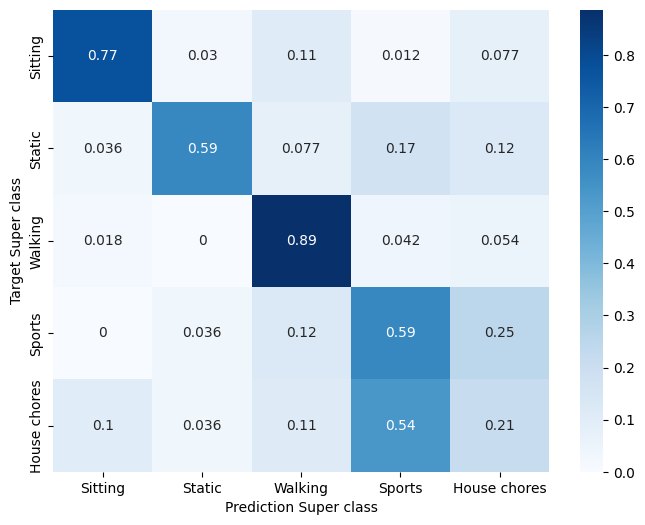

In [22]:
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(ConfMatrix, annot=True, cmap="Blues",  xticklabels=super_classes, yticklabels=super_classes)

# Set labels and title
plt.xlabel("Prediction Super class")
plt.ylabel("Target Super class")
# plt.title("Confusion Matrix")

# Show the plot
plt.show()

---

In [23]:
primary_cols = data_df.columns[16:29]
conf_df = data_df.loc[:, primary_cols]
secondary_cols = ['1' if len(c.split('.'))==1 else str(int(c.split('.')[-1])+1) for c in primary_cols]
conf_df.columns = secondary_cols
conf_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4,5,3,5,3,4,4,3,4,3,4,3,4
1,4,3,3,4,4,4,2,1,4,4,3,4,4
2,3,3,3,4,3,2,2,4,4,3,4,5,5
3,4,4,4,5,4,3,3,4,3,3,2,5,4
4,2,2,1,4,3,3,4,4,4,4,2,3,4


In [24]:
melt_df1 = pd.melt(conf_df, value_vars=secondary_cols)
melt_df1.head()

,variable,value
0,1,4
1,1,4
2,1,3
3,1,4
4,1,2


In [25]:
melt_df['confidence'] = melt_df1['value']
melt_df.head()

,video_id,predict,target,confidence
0,1,Sitting,Sitting,4
1,1,Sitting,Sitting,4
2,1,Sitting,Sitting,3
3,1,Sitting,Sitting,4
4,1,Sitting,Sitting,2


In [26]:
score_df = melt_df.groupby(['predict', 'target'])['confidence'].mean().reset_index()
score_df.head()

,predict,target,confidence
0,House chores,House chores,3.833333
1,House chores,Sitting,2.846154
2,House chores,Sports,3.500000
3,House chores,Static,2.476190
4,House chores,Walking,2.777778


In [27]:
score_df.shape

(23, 3)

In [28]:
conf_mat = score_df.pivot(index='predict', columns='target')
conf_mat.head()

confidence                                        
target       House chores   Sitting    Sports    Static   Walking
predict                                                          
House chores     3.833333  2.846154  3.500000  2.476190  2.777778
Sitting          3.352941  3.769231       NaN  2.333333  2.000000
Sports           3.377778  2.500000  3.696970  3.275862  3.571429
Static           2.000000  2.200000  3.000000  3.606061       NaN
Walking          2.789474  2.833333  3.428571  3.307692  4.375839

In [29]:
conf_melt = pd.melt(conf_mat, value_vars=['confidence'])
conf_melt.head()

,None,target,value
0,confidence,Walking,2.777778
1,confidence,Walking,2.000000
2,confidence,Walking,3.571429
3,confidence,Walking,NaN
4,confidence,Walking,4.375839


In [30]:
conf_melt.fillna(0.0, inplace=True)

In [31]:
conf_mat

confidence                                        
target       House chores   Sitting    Sports    Static   Walking
predict                                                          
House chores     3.833333  2.846154  3.500000  2.476190  2.777778
Sitting          3.352941  3.769231       NaN  2.333333  2.000000
Sports           3.377778  2.500000  3.696970  3.275862  3.571429
Static           2.000000  2.200000  3.000000  3.606061       NaN
Walking          2.789474  2.833333  3.428571  3.307692  4.375839

<Axes: xlabel='None-target', ylabel='predict'>

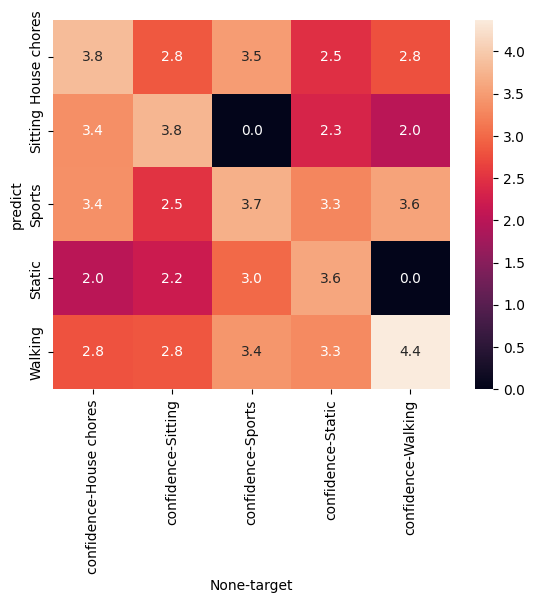

In [32]:
conf_mat.fillna(0.0, inplace=True)
sns.heatmap(conf_mat, annot=True, fmt=".1f")

In [33]:
conf_mat.columns = conf_mat.columns.droplevel(0)

In [34]:
conf_mat = conf_mat.loc[super_classes, super_classes]
conf_mat

target,Sitting,Static,Walking,Sports,House chores
predict,,,,,
Sitting,3.769231,2.333333,2.000000,0.000000,3.352941
Static,2.200000,3.606061,0.000000,3.000000,2.000000
Walking,2.833333,3.307692,4.375839,3.428571,2.789474
Sports,2.500000,3.275862,3.571429,3.696970,3.377778
House chores,2.846154,2.476190,2.777778,3.500000,3.833333


<Axes: xlabel='target', ylabel='predict'>

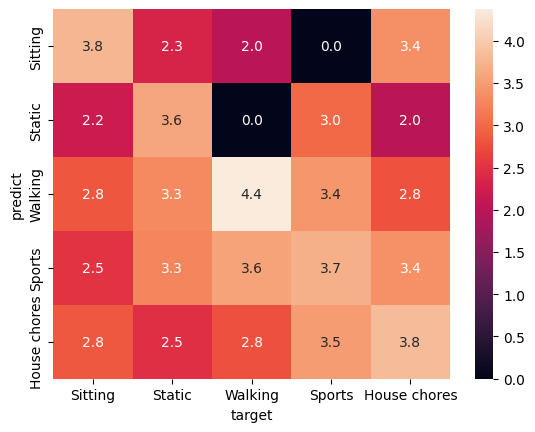

In [35]:
sns.heatmap(conf_mat, annot=True, fmt=".1f")

In [36]:
from matplotlib.cm import get_cmap

def hinton(matrix, colMat, max_value=None, cmap='Blues', figsize=(8, 6)):
    fig, ax = plt.subplots(figsize=figsize)

    if max_value is None:
        max_value = np.max(np.abs(matrix))

    cmap = get_cmap(cmap)

    # ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for (x, y), w in np.ndenumerate(matrix):
        # print(type(colMat[x,y]), colMat[x,y], type(max_value), max_value)
        color = cmap((colMat[y,x] / 1.3) + 0.1 )
        size = np.sqrt(np.abs(w) / max_value)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor='gray')
        ax.add_patch(rect)
        ax.text(x, y, f'{colMat[y,x]:.2f}', ha='center', va='center', color='black')

    ax.autoscale_view()
    ax.invert_yaxis()

    return fig, ax


In [37]:
conf_mat.values

array([[3.76923077, 2.33333333, 2.        , 0.        , 3.35294118],
       [2.2       , 3.60606061, 0.        , 3.        , 2.        ],
       [2.83333333, 3.30769231, 4.37583893, 3.42857143, 2.78947368],
       [2.5       , 3.27586207, 3.57142857, 3.6969697 , 3.37777778],
       [2.84615385, 2.47619048, 2.77777778, 3.5       , 3.83333333]])

In [38]:
ConfMatrix

array([[0.77380952, 0.0297619 , 0.10714286, 0.01190476, 0.07738095],
       [0.03571429, 0.58928571, 0.07738095, 0.17261905, 0.125     ],
       [0.01785714, 0.        , 0.88690476, 0.04166667, 0.05357143],
       [0.        , 0.03571429, 0.125     , 0.58928571, 0.25      ],
       [0.10119048, 0.03571429, 0.11309524, 0.53571429, 0.21428571]])

<ipython-input-36-318bd832b6b2>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(cmap)


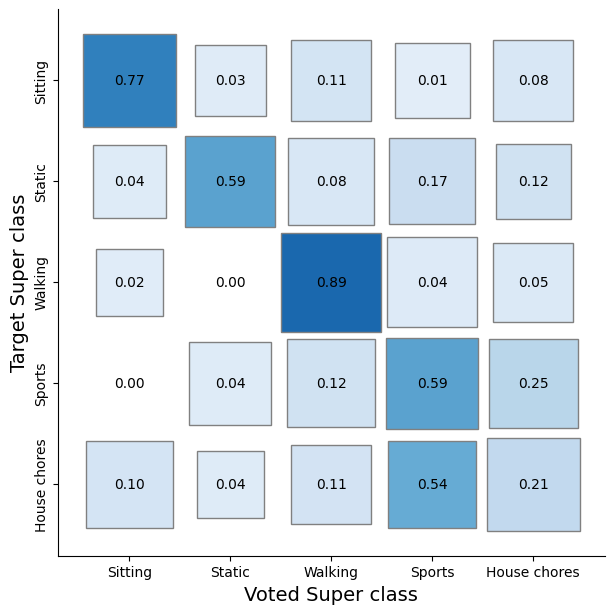

In [39]:
hint_fig, _ = hinton(conf_mat, ConfMatrix, max_value=4.5)
tick_marks = np.arange(len(super_classes))
plt.xticks(tick_marks, super_classes, rotation=0)
plt.yticks(tick_marks, super_classes, rotation=90, va='center')
plt.tight_layout()
plt.ylabel('Target Super class', size=14)
plt.xlabel('Voted Super class', size=14)
hint_fig.savefig('/content/survey_resultV2.png', format='png', dpi=800, bbox_inches='tight')

---

In [40]:
score_df['accuracy'] = conf_melt['value']
score_df.head()

,predict,target,confidence,accuracy
0,House chores,House chores,3.833333,2.777778
1,House chores,Sitting,2.846154,2.000000
2,House chores,Sports,3.500000,3.571429
3,House chores,Static,2.476190,0.000000
4,House chores,Walking,2.777778,4.375839


In [41]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns 

def value_to_color(n_colors, palette, color_min, color_max,val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def hinton_plot(data, columns=[]):
    if columns == []:
        corr = data.corr()
    else:
        data = data.loc[:,columns]
        corr = data.corr()

    corr = pd.melt(corr.reset_index(), id_vars='index')
    corr.columns = ['predict','target','accuracy']

    x = corr['predict']
    y = corr['target']
    size = corr['confidence']

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1)
    ax = plt.subplot(plot_grid[:,:-1])

    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)}

    size_scale = 500
    n_colors = 256
    palette = sns.diverging_palette(20, 220, n=n_colors) 
    color_min, color_max = [-1, 1]

    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size*size_scale,
        c=size.apply(lambda x: value_to_color(n_colors, palette, color_min, color_max, x)),
        marker='s'
    )

    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.set_title("hintonmap for multi-colinearity between features")

    ax = plt.subplot(plot_grid[:,-1])

    col_x = [0]*len(palette)
    bar_y = np.linspace(color_min, color_max, n_colors)
    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )

    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() 


In [42]:
hinton_plot(score_df)

<ipython-input-41-774f1a497b33>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


KeyError: ignored